* ε ～ Gauss（0，θ**2）
/Users/chloe/Desktop/gradiant\ dexcent/data/LogiReg_data.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path='/Users/chloe/Desktop/gradiant_dexcent/data' + os.sep + 'LogiReg_data.txt'
pd_data=pd.read_csv(path,header=None, names=['exam1','exam2','admitted'])
print(pd_data.shape)
print(pd_data.shape[0])
#print(pd_data.shape(1))  #TypeError: 'tuple' object is not callable
pd_data.head()

(100, 3)
100


,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1       100 non-null float64
exam2       100 non-null float64
admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


Text(0,0.5,'exam2 score')

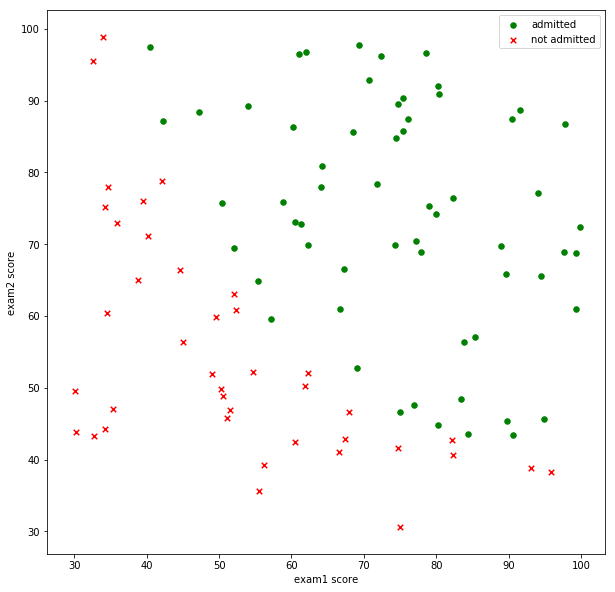

In [9]:
positive=pd_data[pd_data['admitted']==1]
negative=pd_data[pd_data['admitted']==0]

fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(positive['exam1'],positive['exam2'],s=30,c='g',marker='o',label='admitted')
ax.scatter(negative['exam1'],negative['exam2'],s=30,c='r',marker='x',label='not admitted')
ax.legend()
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')

* sigmoid function

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

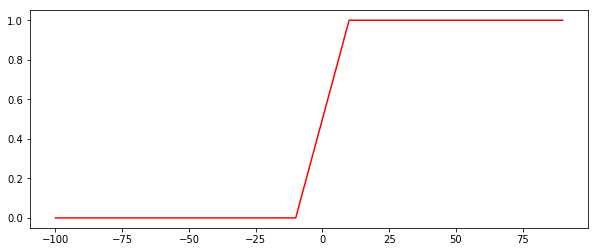

In [5]:
nums=np.arange(-100,100,step=10)
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(nums,sigmoid(nums),'r')

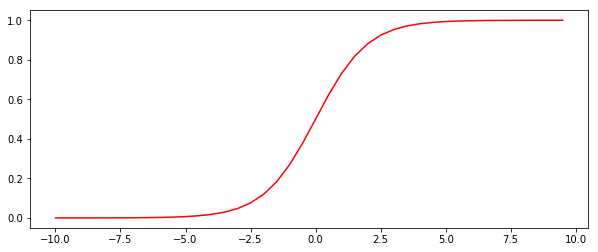

In [6]:
nums2=np.arange(-10,10,step=0.5)
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(nums2,sigmoid(nums2),'r')

In [7]:
def model(x,theta):
    return sigmoid(np.dot(x,theta.T)) # theta.T for matrix transpose

pd_data.insert(0,'ones',1)  #DataFrame.insert(loc, column, value, allow_duplicates=False)
orig_data=pd_data.values
cols=orig_data.shape[1]
x=orig_data[:,:cols-1]
y=orig_data[:,cols-1:cols]
theta=np.zeros([1,3])

In [8]:
x[:5] # check x

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [9]:
y[:5] # check y

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [10]:
theta # check theta

array([[0., 0., 0.]])

##  Logarithmic objective function
* minimize 

In [43]:
def cost(x,y,theta):
    left=np.multiply(-y,np.log(model(x,theta)))
    right=np.multiply(1-y,np.log(1-model(x,theta)))
    return(np.sum(left-right)/len(x))

In [44]:
costs=[cost(x,y,theta)]
costs # theta =zeros([1,3])

[0.6931471805599453]

In [45]:
def gradient(x,y,theta):
    #print(theta.shape)
    grad=np.zeros(theta.shape)
    error=(model(x,theta)-y).ravel()# reduce dimention to one dementional
    for j in range(len(theta.ravel())):
        #print(j)
        term=np.multiply(error,x[:,j])
        grad[0,j]=np.sum(term)/len(x)
        #print(grad[0,j])
    return grad   

In [46]:
gradient(x,y,theta) # theta =zeros([1,3])

array([[ -0.1       , -12.00921659, -11.26284221]])

In [47]:
gradient(x,y,theta).T

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

## three method for gradient 

In [48]:
STOP_ITER=0 # Iteration  method 1
STOP_COST=1 # cost       method 2
STOP_GRAD=2 # gradient   method 3

# three kinds of stop method 

def stop_criterion(type,value, threshold):# stop method 
    if type== STOP_ITER:
        return value > threshold
    elif type==STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type==STOP_GRAD:
        return np.linalg.norm(value) < threshold

In [49]:
# Shuffle the data

import numpy.random
def shuffleData(data):
    np.random.shuffle(data)
    cols=data.shape[1]
    x=data[:,:cols-1]
    y=data[:,cols-1:]
    return x,y

In [50]:
# gradient descent three kinds of batch_size

import time

def descent(data,theta, batch_size,stop_type,threshold,alpha):
    init_time=time.time()
    i=0 # iteration number
    k=0 # batch
    x,y=shuffleData(data)
    # theta=np.zeros([1,3])
    grad=np.zeros(theta.shape)
    costs=[cost(x,y,theta)]
  
    while True:
        grad=gradient(x[k:k+batch_size],y[k:k+batch_size],theta)
        k+=batch_size
        if k>=data.shape[0]:
            k=0
            x,y=shuffleData(data)
        theta=theta-alpha*grad
        costs.append(cost(x,y,theta))
        #cost value costs vector grad& theta vector
        i+=1
        if stop_type == STOP_ITER:       
            value = i
        elif stop_type == STOP_COST:     
            value = costs
        elif stop_type == STOP_GRAD:     
            value = grad
        if stop_criterion(stop_type, value, threshold): 
            break
    return theta, i-1, costs, grad, time.time() - init_time

In [51]:
def runExpe(data, theta, batch_size, stop_type, threshold, alpha):
    #import pdb; pdb.set_trace();
    
    theta, iter, costs, grad, dur = descent(data, theta, batch_size, stop_type, threshold, alpha)
    
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batch_size==n: 
        strDescType = "Gradient"
    elif batch_size==1:  
        strDescType = "Stochastic"
    else: 
        strDescType = "Mini-batch ({})".format(batch_size)
    name += strDescType + " descent - Stop: "
    if stop_type == STOP_ITER: 
        strStop = "{} iterations".format(threshold)
    elif stop_type == STOP_COST: 
        strStop = "costs change < {}".format(threshold)
    else:
        strStop = "gradient norm < {}".format(threshold)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.08s


array([[-0.00027127,  0.00705232,  0.00376711]])

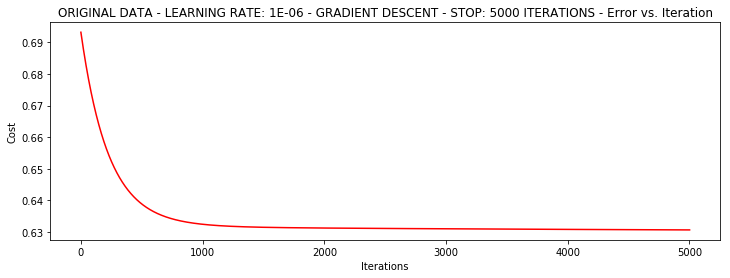

In [52]:
n=orig_data.shape[0]
runExpe(orig_data, theta, n, STOP_ITER, threshold=5000, alpha=0.000001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 26.01s


array([[-5.13364014,  0.04771429,  0.04072397]])

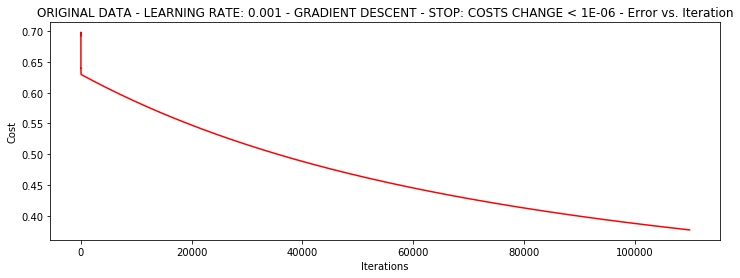

In [53]:
runExpe(orig_data, theta, n, STOP_COST, threshold=0.000001, alpha=0.001)

* time increase and accuracy increase

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 10.06s


array([[-2.37033409,  0.02721692,  0.01899456]])

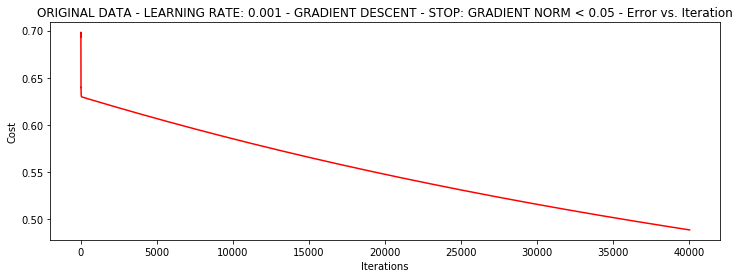

In [54]:
runExpe(orig_data, theta, n, STOP_GRAD, threshold=0.05, alpha=0.001)

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38461038  0.07877502  0.00278013]] - Iter: 5000 - Last cost: 1.57 - Duration: 0.40s


array([[-0.38461038,  0.07877502,  0.00278013]])

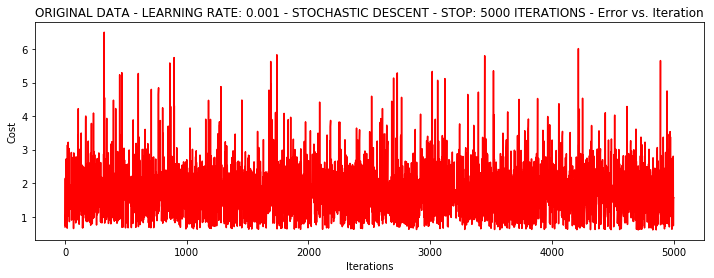

In [55]:
runExpe(orig_data, theta, 1, STOP_ITER, threshold=5000, alpha=0.001)

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202284  0.00996147  0.00084236]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.21s


array([[-0.00202284,  0.00996147,  0.00084236]])

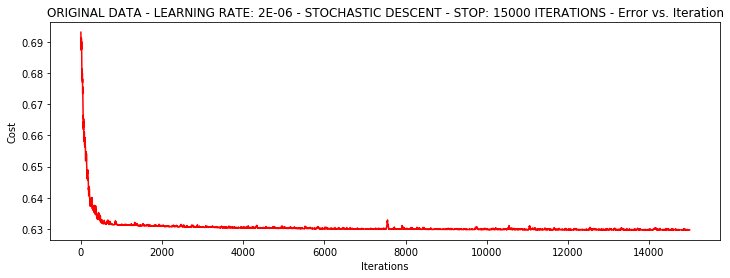

In [56]:
runExpe(orig_data, theta, 1, STOP_ITER, threshold=15000, alpha=0.000002)

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03721758  0.01451951  0.01065225]] - Iter: 15000 - Last cost: 0.56 - Duration: 1.67s


array([[-1.03721758,  0.01451951,  0.01065225]])

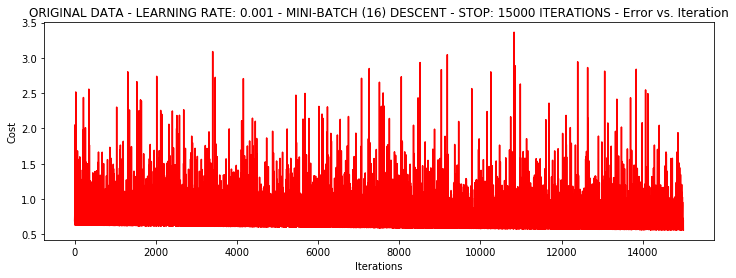

In [57]:
runExpe(orig_data, theta, 16, STOP_ITER, threshold=15000, alpha=0.001)

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[0.57882345 1.56088777 1.4118669 ]] - Iter: 15000 - Last cost: 0.28 - Duration: 1.96s


array([[0.57882345, 1.56088777, 1.4118669 ]])

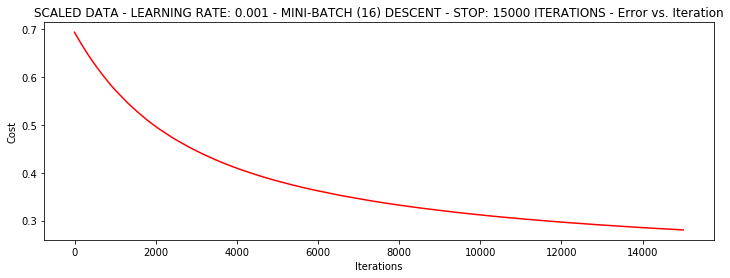

In [60]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])# Q function -mu/delta**2

runExpe(scaled_data, theta, 16, STOP_ITER, threshold=15000, alpha=0.001)